<a href="https://colab.research.google.com/github/deema1999/Tweets_writers_age_classification/blob/main/Tweet_writer_age_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xml.etree.cElementTree as et
import re
import os
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# copy images
!mkdir -p Dataset
!cp -rf /content/gdrive/MyDrive/ML/pan2015 Dataset
!cp -rf /content/gdrive/MyDrive/ML/truth.txt Dataset

In [ ]:
#!unzip /content/Project_Data.zip -d Project_Data

# Play with data

In [ ]:
from textblob import TextBlob
data = "His sellection is bery antresting"
output = TextBlob(data).correct()
output

TextBlob("His selection is very interesting")

In [ ]:
documents = {}
ind = -1
from textblob import TextBlob

for filename in os.listdir('/content/Dataset/pan2015'):
    full_path = os.path.join('/content/Dataset/pan2015', filename)
    tree = et.parse(full_path)
    root = tree.getroot()
    id = root.attrib['id']
    document = "" 
    ind+=1
    for doc in root.iter('document'):  
      text = doc.text
      text = text.lower()
      text = re.sub(r'(.)\1+', r'\1\1', text)
      # Removing URL's
      # text = re.sub(r'http\S+', '', text)
      # Removing puctuations
      # text = re.sub(r'[^\w\s]', '', text)
      # Removing numbers
      # text = re.sub(r'[\d-]', '', text)
      # Removing multiple spaces
      #text = re.sub(r'\s\s+', '', text)
      # Removing redundent charachters
      #text = re.sub(r'([a-z]+?)\1+', r'\1',text)
      document = document + text + ''
    documents[ind] = [id,document]


KeyboardInterrupt: ignored

In [ ]:
df = pd.DataFrame.from_dict(documents , orient='index' , columns=['Id','Tweets'])
df[df['Id'] == "703806e5-f04b-4e7c-8456-7340784ecf76"]['Tweets']

In [ ]:
#input file
fin = open("/content/Dataset/truth.txt", "rt")
#output file to write the result to
fout = open("out.txt", "wt")
#for each line in the input file
for line in fin:
	#read replace the string and write to output file
	fout.write(line.replace(':::', ','))
#close input and output files
fin.close()
fout.close()

In [ ]:

def prepend_line(file_name, line):
    """ Insert given string as a new line at the beginning of a file """
    # define name of temporary dummy file
    dummy_file = file_name + '.txt'
    # open original file in read mode and dummy file in write mode
    with open(file_name, 'r') as read_obj, open(dummy_file, 'w') as write_obj:
        # Write given line to the dummy file
        write_obj.write(line + '\n')
        # Read lines from original file one by one and append them to the dummy file
        for line in read_obj:
            write_obj.write(line)
    # remove original file
    os.remove(file_name)
    # Rename dummy file as the original file
    os.rename(dummy_file, file_name)

prepend_line("out.txt", "Id,Sex,Age,V,X,Y,Z,W")

In [ ]:
truth = pd.read_csv("out.txt")
# storing this dataframe in a csv file
truth.to_csv('out.csv', index = None)
truth.head()

In [ ]:
data = pd.merge(df, truth, on="Id")
data.size

In [ ]:
data['Age'].unique()

In [ ]:
!pip install demoji

In [ ]:
import demoji
data_copy = data.copy()
target_columns = ['Tweets','Age']
data_copy = data_copy[target_columns]
data_copy.head()
t = data_copy['Tweets'][5]
demoji.findall(t)

In [ ]:
# Explore data
print(data_copy['Age'].unique())
print("All types : ",list(set(data_copy.dtypes.tolist())))

In [ ]:
# To check missing values
print('Sum : \n',data_copy.isnull().sum())
sns.heatmap(data_copy.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [ ]:
# Dropping the duplicate rows
duplicate_rows = data_copy[data_copy.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)

data_copy.drop_duplicates(inplace=True)
print("number of duplicate rows : ",data_copy[data_copy.duplicated()].shape)

In [ ]:
# data visualization
sns.countplot(data_copy['Age'])

In [ ]:
data_copy["Age"] = data_copy["Age"].map({"18-24":1, "25-34":int(2), "35-49":int(3), "50-XX":int(4)})
print(data_copy.head())

# Models Implementation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.metrics import accuracy_score

Y = data_copy["Age"].values
# split the dataset into training data and test data
from sklearn.model_selection import train_test_split
X_train_NB, X_test_NB, Y_train_NB, Y_test_NB = train_test_split(data_copy, Y, 
                        test_size= 0.20, random_state=100, stratify=Y) # 0.35 ==> SVM : 76

vec = CountVectorizer()
train_vectors = vec.fit_transform(X_train_NB['Tweets'])
test_vectors = vec.transform(X_test_NB['Tweets'])

print("train data : ", train_vectors.shape)
print("test data : ", test_vectors.shape)

ValueError: ignored

# Naive Bayes

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
 MultinomialNB(alpha=0.5) 
               precision    recall  f1-score   support

           1       0.73      0.92      0.81        12
           2       0.53      0.67      0.59        12
           3       1.00      0.20      0.33         5
           4       0.00      0.00      0.00         2

    accuracy                           0.65        31
   macro avg       0.57      0.45      0.44        31
weighted avg       0.65      0.65      0.60        31

Confusion matrix: 
 [[11  1  0  0]
 [ 4  8  0  0]
 [ 0  4  1  0]
 [ 0  2  0  0]]
--------------------------------------

Accuracy with 10-kfold: 64.49 %
Standard Deviation: 12.83 %


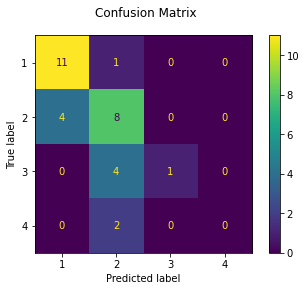

In [ ]:
# Classify using Naive Bayes 
# with tfidf : 0.58 , with countVec 0.71 || First method when combining user's tweets
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
MNB_clf = MultinomialNB(alpha=0.5)

# fit model no training data
MNB_clf.fit(train_vectors, Y_train_NB)

# making predictions on the testing set 
predicted = MNB_clf.predict(test_vectors)

# Classification report
from sklearn import metrics
print("Classification report : \n", MNB_clf,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(MNB_clf, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

print("--------------------------------------")
accuracies = cross_val_score(estimator = MNB_clf, X = train_vectors, y = Y_train_NB, cv = 10)
print("\nAccuracy with 10-kfold: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# Logistic Reg

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
               precision    recall  f1-score   support

           1       0.79      0.92      0.85        12
           2       0.59      0.83      0.69        12
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.68        31
   macro avg       0.34      0.44      0.38        31
weighted avg       0.53      0.68      0.59        31

Confusion matrix: 
 [[11  1  0  0]
 [ 2 10  0  0]
 [ 0  5  0  0]
 [ 1  1  0  0]]
------------------------------------------------

Accuracy with 10-kfold: 71.92 %
Standard Deviation: 9.17 %


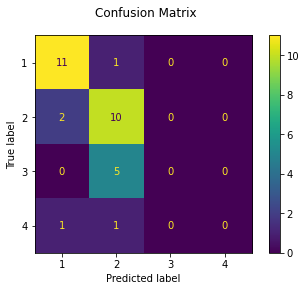

In [ ]:
# Classify using Logistic Regression #0.71
# with tfidf : 0.71 , with countVec 0.84
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=10, random_state=42)

# fit model no training data
logisticRegr.fit(train_vectors, Y_train_NB)

# making predictions on the testing set 
predicted = logisticRegr.predict(test_vectors)

# Classification report
from sklearn import metrics
print("Classification report : \n", logisticRegr,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(logisticRegr, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

print("------------------------------------------------")
accuracies = cross_val_score(estimator = logisticRegr, X = train_vectors, y = Y_train_NB, cv = 10)
print("\nAccuracy with 10-kfold: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# SVM

Classification report : 
 SVC(C=10, gamma=0.0001) 
               precision    recall  f1-score   support

           1       0.75      1.00      0.86        12
           2       0.91      0.83      0.87        12
           3       1.00      0.40      0.57         5
           4       1.00      1.00      1.00         2

    accuracy                           0.84        31
   macro avg       0.91      0.81      0.82        31
weighted avg       0.87      0.84      0.83        31

Confusion matrix: 
 [[12  0  0  0]
 [ 2 10  0  0]
 [ 2  1  2  0]
 [ 0  0  0  2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


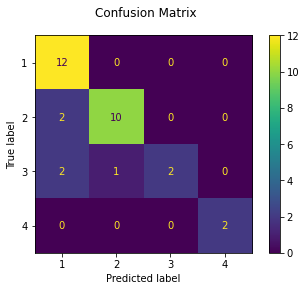

In [ ]:
# Classify using SVM - 0.77 after tuning 0.81 by using C=10
# with tfidf : 0.81 , with countVec 0.81
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import pickle
# all parameters not specified are set to their defaults
svmClassifier = SVC(kernel="rbf", C=10, gamma=0.0001)
#svm_classifier = SVC()


#svm_classifier = SVC(kernel="poly", degree=5, C=10, gamma=0.01)
#svm_classifier = SVC(kernel="sigmoid", C=10, gamma=0.001)
#svm_classifier = SVC(kernel="rbf", C=300, gamma=0.001)

# fit model no training data
svmClassifier.fit(train_vectors, Y_train_NB)

# making predictions on the testing set 
predicted = svmClassifier.predict(test_vectors)

# Classification report
from sklearn import metrics
print("Classification report : \n", svmClassifier,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(svmClassifier, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

'''
print("------------------------------------------------")
accuracies = cross_val_score(estimator = svmClassifier, X = train_vectors, y = Y_train_NB, cv = 10)
print("\nAccuracy with 10-kfold: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))'''
pickle.dump(svmClassifier, open("svc_model", 'wb'))

0.8387096774193549
Confusion matrix: 
 [[12  0  0  0]
 [ 2 10  0  0]
 [ 2  1  2  0]
 [ 0  0  0  2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


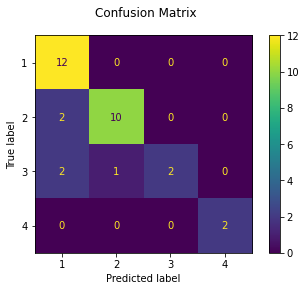

In [ ]:
loaded_model = pickle.load(open("svc_model", 'rb'))
result = loaded_model.score(test_vectors, Y_test_NB)
print(result)

#Classification report
from sklearn import metrics
disp = metrics.plot_confusion_matrix(svmClassifier, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

# KNN

Classifier :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
Classification report for classifier : 
               precision    recall  f1-score   support

           1       0.55      1.00      0.71        12
           2       0.71      0.42      0.53        12
           3       1.00      0.20      0.33         5
           4       1.00      0.50      0.67         2

    accuracy                           0.61        31
   macro avg       0.81      0.53      0.56        31
weighted avg       0.71      0.61      0.57        31

Confusion matrix: 
 [[12  0  0  0]
 [ 7  5  0  0]
 [ 2  2  1  0]
 [ 1  0  0  1]]


'\nprint("-------------------------------------------")\naccuracies = cross_val_score(estimator = knn_cls, X = train_vectors, y = Y_train_NB, cv = 10)\nprint("\nAccuracy with 10-kfold: {:.2f} %".format(accuracies.mean()*100))\nprint("Standard Deviation: {:.2f} %".format(accuracies.std()*100))'

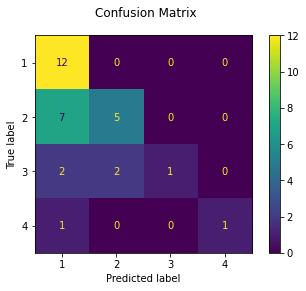

In [ ]:
# Classify using KNN 0.65
# with tfidf : 0.65 , with countVec 0.52

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 

# Create the classifier
"""
algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the 
values passed to fit method.
"""
knn_cls = KNeighborsClassifier(n_neighbors = 10) # 77%

# Train the classifier
knn_cls.fit(train_vectors,Y_train_NB)

# Predict the value of X_test
predicted = knn_cls.predict(test_vectors)

# Classification report
from sklearn import metrics
print("Classifier : ", knn_cls)
print("Classification report for classifier : \n",
      metrics.classification_report(Y_test_NB, predicted))

disp = metrics.plot_confusion_matrix(knn_cls, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

'''
print("-------------------------------------------")
accuracies = cross_val_score(estimator = knn_cls, X = train_vectors, y = Y_train_NB, cv = 10)
print("\nAccuracy with 10-kfold: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))'''

# SGD

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.63      1.00      0.77        12
           3       0.00      0.00      0.00         5
           4       1.00      0.50      0.67         2

    accuracy                           0.77        31
   macro avg       0.66      0.60      0.60        31
weighted avg       0.70      0.77      0.71        31

Confusion matrix: 
 [[11  1  0  0]
 [ 0 12  0  0]
 [ 0  5  0  0]
 [ 0  1  0  1]]
----------------------------------

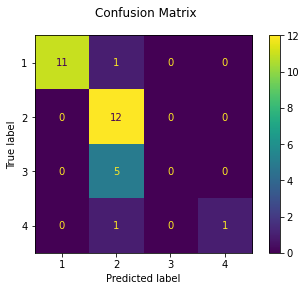

In [ ]:
# Classify using SGD 0.81
# with tfidf : 0.81 , with countVec 0.84

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
# all parameters not specified are set to their defaults
sgdClassifier = SGDClassifier(random_state=42)

# fit model no training data
sgdClassifier.fit(train_vectors, Y_train_NB)

# making predictions on the testing set 
predicted = sgdClassifier.predict(test_vectors)

# Classification report
from sklearn import metrics
print("Classification report : \n", sgdClassifier,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(sgdClassifier, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

print("-------------------------------------------")
accuracies = cross_val_score(estimator = sgdClassifier, X = train_vectors, y = Y_train_NB, cv = 10)
print("\nAccuracy with 10-kfold: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# XGBoosting

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) 
               precision    recall  f1-score   support

           1       0.79      0.92      0.85        12
           2       0.59      0.83      0.69        12
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.68        31
   macro avg       0.34      0.44      0.38        31
weighted avg       0.53      0.68      0.59        31

Confusion matrix: 
 [[11  1  0  0]
 [ 2 10  0  0]
 [ 0  5  0  0]
 

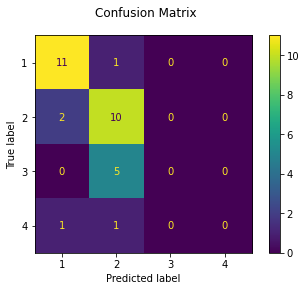

In [ ]:
# Classify using XGBoosting 0.65
# with tfidf : 0.65 , with countVec 0.71

from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
XG_clf = XGBClassifier(random_state=100)

# fit model no training data
XG_clf.fit(train_vectors, Y_train_NB)

# make predictions for test data
y_pred = XG_clf.predict(test_vectors)
predicted = [round(value) for value in y_pred]

# Classification report
from sklearn import metrics
print("Classification report : \n", XG_clf,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(XG_clf, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

print("------------------------------------------------")
accuracies = cross_val_score(estimator = svmClassifier, X = train_vectors, y = Y_train_NB, cv = 10)
print("\nAccuracy with 10-kfold: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# MLP

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
 MLPClassifier(activation='logistic', alpha=0.005, batch_size=64, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) 
               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       0.67      0.83      0.74        12
           3       0.00      0.00      0.00         5
           4       0.50      0.50      0.50         2

    accuracy                           0.74        31
   macro avg       0.51      0.58      0.54        31
weighted avg       0.62      0.74      0.68        31

Confusion

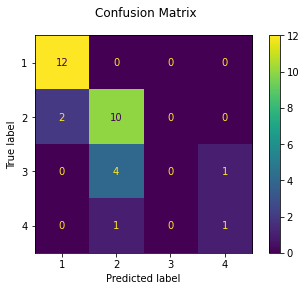

In [ ]:
# Classify using MLPClassifier 0.81(50/100,50)
# with tfidf : 0.81 , with countVec 0.84(100,50) 0.87(100,50,50)

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,50, ), batch_size=64,
                    solver="adam", alpha=0.005, activation="logistic", 
                    max_iter=50000, random_state=42)


# fit model no training data
mlp.fit(train_vectors, Y_train_NB)

# make predictions for test data
predicted = mlp.predict(test_vectors)

# Classification report
from sklearn import metrics
print("Classification report : \n", mlp,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(mlp, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


# Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
               precision    recall  f1-score   support

           1       0.69      0.92      0.79        12
           2       0.53      0.67      0.59        12
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.61        31
   macro avg       0.31      0.40      0.34        31
weighted avg       0.47      0.61      0.53     

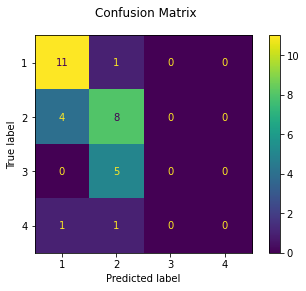

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# training the model on training set

# n_estimators : The number of trees in the forest.
# max_depth : The maximum depth of the tree.
# n_jobsint : The number of jobs to run in parallel
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=10)
rf_clf.fit(train_vectors,Y_train_NB)

# making predictions on the testing set 
predicted = rf_clf.predict(test_vectors)

# comparing actual response values (y_test) with predicted response values (predicted)
print("Classification report : \n", rf_clf,"\n", metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(rf_clf, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


# Cross Validation

In [ ]:
# Cross-validation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Y = data_copy["Age"].values
vec = CountVectorizer()

# split the dataset into training data and test data
from sklearn.model_selection import train_test_split
X_train_NB, X_test_NB, Y_train_NB, Y_test_NB = train_test_split(data_copy, Y, 
                        test_size= 0.20, random_state=100, stratify=Y)


train_vectors = vec.fit_transform(X_train_NB['Tweets'])
test_vectors = vec.transform(X_test_NB['Tweets'])

print("\n K-fold Cross-Validation : *********")
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=100)
model_2 = SVC(C= 10, gamma=0.0001, kernel='rbf')
results_model_2 = cross_val_score(model_2, train_vectors, Y_train_NB, cv=kfold)
print("Scores   2 :",results_model_2)
print("Accuracy 2 :",results_model_2.mean())
print("std      2 :",np.std(results_model_2))

'''
print("\n Stratified K-fold Cross-Validation : *********")
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=10, random_state=100)
model_3 = SVC(kernel="linear", C=10.0, gamma= 0.1)
results_model_3 = cross_val_score(model_3, train_vectors, Y_train_NB[:7000], cv=skfold)
print("Scores   3 :",results_model_3)
print("Accuracy 3 :",results_model_3.mean())
print("std      3 :",np.std(results_model_3))'''


 K-fold Cross-Validation : *********


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Scores   2 : [0.61538462 0.25       0.75       0.83333333 0.75       0.91666667
 0.83333333 0.58333333 0.66666667 0.83333333]
Accuracy 2 : 0.7032051282051281
std      2 : 0.18153705815769308


'\nprint("\n Stratified K-fold Cross-Validation : *********")\nfrom sklearn.model_selection import StratifiedKFold\nskfold = StratifiedKFold(n_splits=10, random_state=100)\nmodel_3 = SVC(kernel="linear", C=10.0, gamma= 0.1)\nresults_model_3 = cross_val_score(model_3, train_vectors, Y_train_NB[:7000], cv=skfold)\nprint("Scores   3 :",results_model_3)\nprint("Accuracy 3 :",results_model_3.mean())\nprint("std      3 :",np.std(results_model_3))'

# Hyperparameters Tuning

Fitting 5 folds for each of 78 candidates, totalling 390 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:   29.5s finished


----------------------------------------------------------------------
The best parameter after tuning : {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Our model looks after hyper-parameter tuning SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Classification report : 
 GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 50, 100, 500,

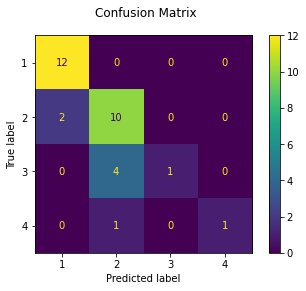

In [ ]:
# Hyperparameters Tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

param_grid = [
  {"C": [1, 10, 50, 100, 500, 1000], "kernel": ["linear"]},
  {"C": [1, 10, 100, 1000],"degree":[3, 5, 7],  "gamma": [0.001, 0.0001], "kernel": ["poly"]},
  {"C": [1, 10, 20, 50, 100, 500, 1000, 2000], "gamma": [0.001, 0.0001 , 0.0003], "kernel": ["rbf", "sigmoid"]},
  # {'alpha':[0.0001 ,0.5, 0.001 , 2 , 5 ,20]}
  # {"hidden_layer_sizes":[(100,50, ) ,(100,100)], "batch_size":[64],"solver":["adam"], "alpha":[0.005 , 0.0001], "activation":["logistic"], "max_iter":[50000], "random_state":[42]}
]

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
grid.fit(train_vectors, Y_train_NB)

print("----------------------------------------------------------------------")
print("The best parameter after tuning :",grid.best_params_)  
print("Our model looks after hyper-parameter tuning",grid.best_estimator_)

predicted = grid.predict(test_vectors)

from sklearn import metrics
print("Classification report : \n", grid,"\n", 
      metrics.classification_report(Y_test_NB, predicted))
disp = metrics.plot_confusion_matrix(grid, test_vectors, Y_test_NB)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

# Gradio

In [ ]:
!pip install gradio

     |████████████████████████████████| 2.5MB 14.4MB/s 
     |████████████████████████████████| 215kB 50.0MB/s 
     |████████████████████████████████| 1.9MB 57.2MB/s 
     |████████████████████████████████| 962kB 56.2MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 3.2MB 63.9MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=5cb3211bdb5d9170eb39caddeae95c1368fd547b90356a8176ead8564bdcb4b6
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=eff29750131d6018c4f3b3b78f4361a0005ad372502662854bba73412989be1c
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
Successfully built ffmpy flask-cachebuster


In [ ]:
# https://www.gradio.app/ml_examples
# https://www.kaggle.com/scolianni/mnistasjpg

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gradio as gr
import requests

def inference(tweet):
    labels = ['18-24', '25-34', '35-49', '50-XX']
    texts = vec.transform([tweet])
    pred = mlp.predict_proba(texts)
    #pred = np.append(pred,int(not pred[0]))
    dictionary = dict(zip(labels, map(float, pred[0])))
    return dictionary


gr.Interface(fn=inference, 
             inputs="textbox", 
             outputs=gr.outputs.Label(num_top_classes=4)).launch(share=True) #, debug=True Use in Colab




Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://24478.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://24478.gradio.app')